In [1]:
import warnings
warnings.filterwarnings('ignore')

# 1. Pandas | Pre-procesamiento

Utilizaremos una base de datos sobre países para tareas de pre-procesamiento

In [2]:
import sqlite3
import pandas as pd

In [3]:
conn = sqlite3.connect("countries_new.db")
# TABLES: all_countries, currencies

In [4]:
# se utilizará la tabla all_countries
query = "SELECT * FROM all_countries"

,country_code,country_name,country_alpha3_code,country_numeric_code,capital,country_demonym,total_area,population,currency_code,lang_code
112,BZ,Belize,BLZ,NaN,Belmopan,Belizeans,22966.0,382444.0,BZD,EN
5,NL,Netherlands,NLD,NaN,Amsterdam,Netherlanders,41543.0,17110161.0,EUR,NL
253,MC,Monaco,MCO,NaN,Monaco,Monacans,2.0,38897.0,EUR,FR
175,KZ,Kazakhstan,KAZ,NaN,Astana,Kazakhstanis,2724900.0,18403860.0,KZT,RU
249,BG,Bulgaria,BGR,NaN,Sofia,Bulgarians,NaN,NaN,BGN,GB


### 1.1 Estadisticas generales sobre el dataset

### 1.2 Filas/Países repetidos

Cada código de país, debería aparecer una sola vez

(262, 249)

In [8]:
#Eliminar las filas repetidas

df_countries.shape

(249, 10)

### 1.3 Tratamiento de valores faltantes

country_code              0
country_name              0
country_alpha3_code      37
country_numeric_code    209
capital                   0
country_demonym           2
total_area               30
population               39
currency_code             1
lang_code                 0
dtype: int64

##### 1.3.1 Eliminar la columna country_numeric_code

##### 1.3.2 Rellenar NANs en la columna total_area

##### 1.3.3 Rellenar NaNs en la columna population

##### 1.3.4 Rellenar NaNs en la columna country_alpha3_code

____

# 2. Visualización de datos

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

En la parte de visualización de datos, se utilizará el Exchanges Rates API https://exchangeratesapi.io/ para obtener los tipos de cambio respecto al dolar para el mes de Julio del 2019

In [18]:
import requests
import numpy as np

In [19]:
endpoint = f"""
https://api.exchangeratesapi.io/history
    ? ..
    & ..
    & ..
"""

In [ ]:
endpoint = endpoint.replace('\n', '')
endpoint = endpoint.replace(' ', '')

In [21]:

response.status_code, response.reason

(200, 'OK')

In [22]:
import json
#..
#solo utilizar el campo rates del diccionario obtenido como respuesta
exchange_df = pd.DataFrame(data['rates']).T
#es necesario ordenar las fechas
exchange_df = exchange_df.sort_index()
#22 días (solo se toman en cuenta días hábiles) para 33 monedas
exchange_df.shape

(22, 33)

### 2.1 Comparación entre las medias del tipo de cambio de todas las monedas

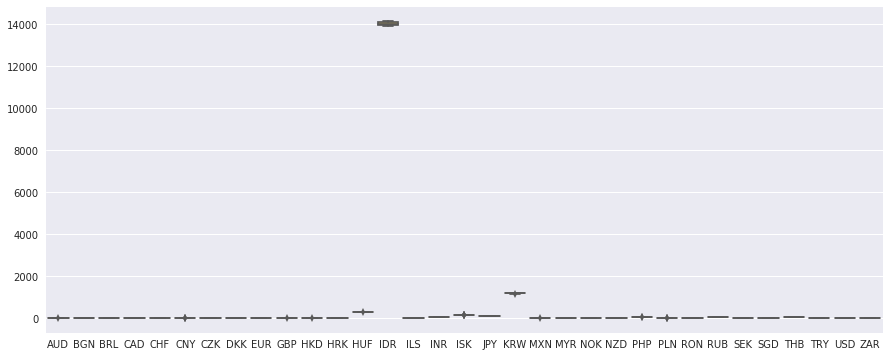

In [23]:
#Que no hacer
plt.figure(figsize=(15,6))
sns.boxplot(data=exchange_df, orient="v", palette="Set2")

In [ ]:
plt.figure(figsize=(15,6)) #utilizar esta instrución para agrandar el tamaño de la figura
#..

### 2.2 Cambio en el tiempo del tipo de cambio del Euro y la Libra Esterlina

### 2.3 ¿Habrá correlaciones entre los tipos de cambio de las diferentes monedas?

In [ ]:
plt.figure(figsize=(15,15)) #tamaño de la figura
cmap = sns.diverging_palette(220, 10, as_cmap=True)#paleta de colores
#..

##### Graficar un caso donde haya alta correlación y otro donde ocurra lo contrario